In [1]:
import numpy as np
import matplotlib.pyplot as plt

from raml.activations import Identity, Sigmoid, Relu, LeakyRelu, Softmax
from raml.costs import MSE, CrossEntropy, CategoricalCrossEntropy
from raml.metrics import RMSE
from raml.layers import Dense
from raml.models import Sequential

from raml.utils import format_data, plot_history
from raml.datasets.load import Wine_Quality, Swedish_Auto_Insurance, Boston_House_Price 
from raml.preprocessing import Normalizer, train_test_split

In [2]:
from raml.datasets.mnist import Mnist

X, Y = Mnist()

Pulling cashed Mnist


Loss:3.536, RMSE:0.334, val_Loss:3.918, val_RMSE:0.321: 100%|██████████| Epochs 2/2 [00:00<00:00, 15.67it/s]
111.88194237917526
113.2350856926808
83.79262399075873
83.75475422926172
47.33502807323341
43.21223612300267
38.3828997942421
35.21438609544005
28.823280634156113
38.959121757295804
22.76968807156607
18.543207943456252
18.111816541185206
16.314099997764757
15.803554859173547
29.052580644759384
13.465742528709164
11.54136108940609
12.382625289496927
9.964767253559582
9.933039405947575
10.929496404434559
8.91660426818743
12.590600187453571
7.97168895846425
7.047664621800269
7.021535748680699
5.936379939020959
6.107687277853635
6.851784260113165
5.887242981092174
6.376042909851874
5.796307936581663
5.275218527073161
5.345405221622844
8.41576865261691
5.010255762065749
3.2475216168170453
4.811592781784537
5.000719872705375
4.571768265381406
4.020418410857085
4.488311279144478
2.818713554329495
4.647649749573725
6.790656769642722
4.310008039851545
1.95989656174529
4.153972651788889
2

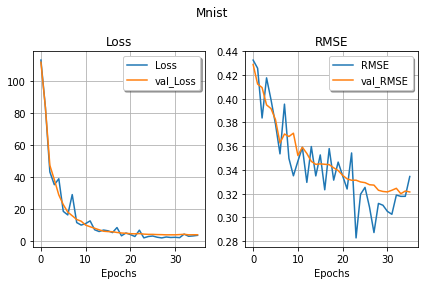

In [3]:

(x_train, x_val, _), (y_train, y_val, _) = \
        train_test_split(X, Y=Y, ratio=[0.5, 0.4, 0.1], shuffle=True, random_seed=7)

ITERATIONS = 2

model = Sequential([
    Dense(size=100, input_shape=x_train.shape, activation=LeakyRelu),
    Dense(size=20, activation=LeakyRelu),
    Dense(size=10, activation=Softmax),
])

model.compile(cost=CategoricalCrossEntropy(), metrics=[RMSE()])

history = model.fit(x_train, y_train, epochs=ITERATIONS, x_val=x_val, y_val=y_val, batchsize=32)

plot_history(history, title="Mnist")
